# Bow data processing to extract cutting efficiency of a diamond wire

These Jupyter modules allow the batch 3D plotting of the cutting efficiency calculated from bow data measured in-situ during diamond-wire cutting of a silicon brick into wafers for several cuts. Beforehand, the cutting-efficiency calculation is  performed using the Jupyter modules "Bow2Kappa" where the results are saved in a file named 'Results_' + cut_name +'.xlsx' for each of the cuts concerned by this batch plot. This file should contents a sheet named "Kappa" with the computed cutting efficiency (${\rm{10}}$${^{ - 7}}$ ${\rm{m.N}}$${^{ - 1}}$) versus the percentage of cut duration.
<br>
    
### Inputs
The batch plot requires the following parameters:
<br>
- cuts: the list of the cut references
- sensors_nbr: Number of sensors used for the bow measurements that must be the same for all the cuts to be plot
  <br>

### Outputs
Figures with the following plots corresponding to the cuts list on the same axis range between a specified cutting progress range:
<br>
 - 3D plots of the cutting efficiency 
 - Cutting efficiency histograms using a specified number of bins (argument: kappa_bins) 
 - Boxplot of the cutting efficiency 
<br>     
     

In [1]:
# Main for this cell
'''
CELL N°1
Specification of paths and file names
'''
# Standard library imports
import os
from pathlib import Path

#Jupiter specific
%matplotlib inline 

# Root directory for all files 
root = Path("C:/Users/franc/OneDrive/Bureau/confocal")
data_folder = Path("fichiers/publi INES") 
if not os.path.isdir(root) : 
    root = Path('/Users/amal/Documents/0- AC sur Mac/Coustier & al_extrait') 
    data_folder = "Fichiers EXEL corrigés"

# Path identification for data access and results saving
my_path= root / Path(data_folder)

# Data set identification
cuts = ["125","118_4","127"] 
sensors_nbr = 4

print('Cell 1 done')

Cell 1 done


# Batch 3D plot

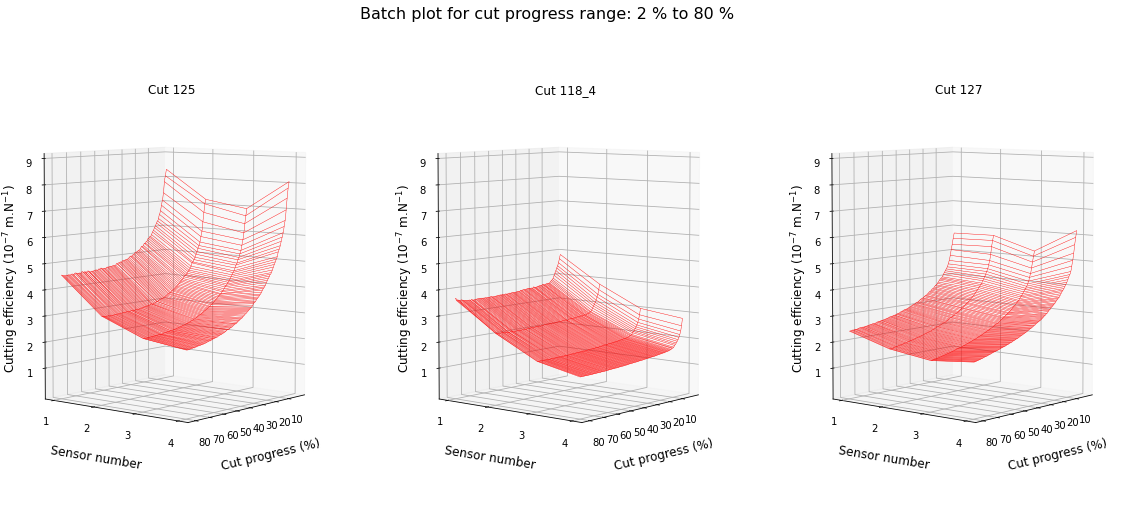

In [2]:
def Kappa_Wireframe(x, y, z, z_min, z_max, sensors_nbr, cut_progress_nb, ax): 

    '''
    Version 2021.02.10
    Wireframe 3D plot configuration of the cutting efficiency values 
    as function of the cut progress and the sensor number
    
    Inputs
    - x:  1D array of the interpolated values of the cut progress for the wireframe 3D plot 
      as arranged by Kappa_3Dplot_values function
    - y:  1D array of the interpolated values of the sensor number for the wireframe 3D plot 
      as arranged by Kappa_3Dplot_values function  
    - z: 2D array of cutting efficiency as arranged by Kappa_3Dplot_values function
    - z_min, z_max: minimum and maximum values of z range 
      used for zaxis in the 3D plot
    - sensors_nbr: number of sensors used for the bow in-situ measurements (parameter of the cut)
    - cut_progress_nb: number of cut progress sampling points (parameter of the cut)
    - ax: figure subplot description
    
    Outputs
    - Wireframe 3D plot configuration of z values 
      as function of x and y 
    '''    

    # 3rd party imports
    import matplotlib.pyplot as plt
    
    # Set plot parameters
    ticks_size = 10  # fontsize of ticks labels 
    label_size = 12  # fontsize of axes labels
    line_space = 2   # line spacing between ticks labels and axe label
    x0 = [10,20,30,40,50,60,70,80]                  # xticklabels
    y0 = [i for i in range(1,sensors_nbr+1)]        # yticklabels 
    z_min_rnd,z_max_rnd,z_step_nbr= int(round(z_min)),int(round(z_max)),1
    z0=[i for i in range(z_min_rnd+1,z_max_rnd+1)]  # yticklabels 
    thickness = 0.4  # Line thickness of the 3D plot curves 
    plot_azim = 40   # 3D plot azimut
    plot_elev = 5    # 3D plot elevation 
    
    # Set a wireframe 3D plot
    surf=ax.plot_wireframe(x, y, z, thickness, rcount=cut_progress_nb, \
                           ccount=sensors_nbr-1, color='red')  
      
    # Set plot title
    ax.set_title(f'Cut {cut_name}', fontsize = label_size) 
    # Set point of view of 3D plot
    ax.view_init(elev=plot_elev, azim=plot_azim)           
    
    # Set x axe   
    ax.set_xticks(x0, minor=False)
    ax.set_xticklabels(x0, fontsize=ticks_size)
    ax.set_xlabel('\nCut progress (%)', linespacing=line_space, fontsize=label_size) 
    
    # Set y axe    
    ax.set_yticks(y0, minor=False)          # set ticks label for y axis (integer values)
    ax.set_yticklabels(y0, fontsize=ticks_size)
    ax.set_ylabel('\nSensor number', linespacing=line_space, fontsize=label_size) 
    
    # Set z axe 
    ax.set_zlim(z_min, z_max)   # set limits of z axis 
    ax.set_zticks(z0, minor=False)
    ax.set_zticklabels(z0, fontsize=ticks_size)    
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('Cutting efficiency (10$^{-7}$ m.N$^{-1}$)', \
                  rotation=90, fontsize=label_size)  
    

def Kappa_3Dplot_values(output_file,val_min, val_max,z_min,z_max,sensors_nbr): 
    
    '''
    Version 2021.02.10
    Arrangement of the cutting efficiency calculated from the bow in-situ measurements
    by bow2kappa function for a wireframe 3D plot
    
    Inputs
    - output_file: name of the results file (output of bow2kappa function)
    - val_min, val_max : minimum and maximum values of the cut progress range 
      used for data selection and xaxis in the 3D plot
    - z_min, z_max: minimum and maximum values of the cutting efficiency range 
      used for zaxis in the 3D plot
    - sensors_nbr: number of sensors used for the bow in-situ measurements (parameter of the cut)
    
    Outputs
    - 3D plot of the cutting efficiency values 
    '''
    
    # 3rd party imports
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy import interpolate
  
    # Get the cutting efficiency data to plot
    kappa_cols = {
                0: "B",
                1: "C",
                2: "D",
                3: "E",
                4: "F",
                5: "G"    
                }
    endcol=kappa_cols[sensors_nbr+1]
    usecols = 'B:'+ str(endcol)
    dkappa = pd.read_excel(output_file,
                         sheet_name ='Kappa', 
                         usecols=usecols)

    # Select cut progress range and build x,y,z values distribution suitable for the 3D plot
    dkappa.rename({"Cut progress (%)":"A"}, axis=1, inplace=True) # Rename colonne for query attribute use
    df= dkappa.query('A > @val_min and A < @val_max') 
    u = [i for i in range(1,sensors_nbr+1)] # Sensor number 
    v = list(df['A'])                       # % of cut 
    cut_progress_nb= len(v)                 # Number of cut progress values
    df=df.drop(['A'],axis=1)                # Keep only z values in df
    z = df.values                           # 2D array of z values

    # z calculation at interpolated values of u,v  
        # Definition of 2D linear interpolation function
    newfunc = interpolate.interp2d(u,v,z,kind='linear')
        # New sampling of 1000 points along x between extrema of x1
    unew = np.linspace(u[0] , u[-1], num=1000, endpoint=True)
        # New sampling of 1000 points along y between extrema of y1
    vnew = np.linspace(v[0] , v[-1], num=1000, endpoint=True)
        # Use of the defined newfunc as 2D linear interpolation
        # (x,y) mesh re-construction for the (xnew,ynew) positions
    y,x = np.meshgrid(unew, vnew)     
        # for the calculation of z at the (xnew,ynew) positions 
    znew = newfunc(unew, vnew)        

    return x, y, znew, cut_progress_nb
      
# # #    
# Main for this cell
# # #

# 3rd party imports
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set the plot range for the cutting progress in % of cut duration
cut_min, cut_max = 2, 80

# Set the plot range for the cutting efficiency in 10^-7 m/N 
eff_min, eff_max = 0, 9

# Set figure parameters
fig = plt.figure(figsize=(20,8))   # Plot area 
gs = gridspec.GridSpec(1, len(cuts))
fig.suptitle(f'Batch plot for cut progress range: {cut_min} % to {cut_max} %', fontsize = 16)

# Batch wireframe 3D plot of the cuts
i_ax=0
for cut_name in cuts:
    
    # Set x,y,z values for the wireframe 3D plot 
    kappa_file_name = 'Results_' +cut_name+'.xlsx'
    kappa_file = my_path / kappa_file_name
    x,y,z,cut_progress_nb = Kappa_3Dplot_values(kappa_file,cut_min,cut_max,eff_min,eff_max,sensors_nbr)
   
    # Plotting the wireframe 3D plot
    ax=fig.add_subplot(gs[0,i_ax], projection='3d') # Frame for 3D plot 
    Kappa_Wireframe(x, y, z, eff_min, eff_max, sensors_nbr, cut_progress_nb, ax)
    i_ax=i_ax+1
    
plt.show()

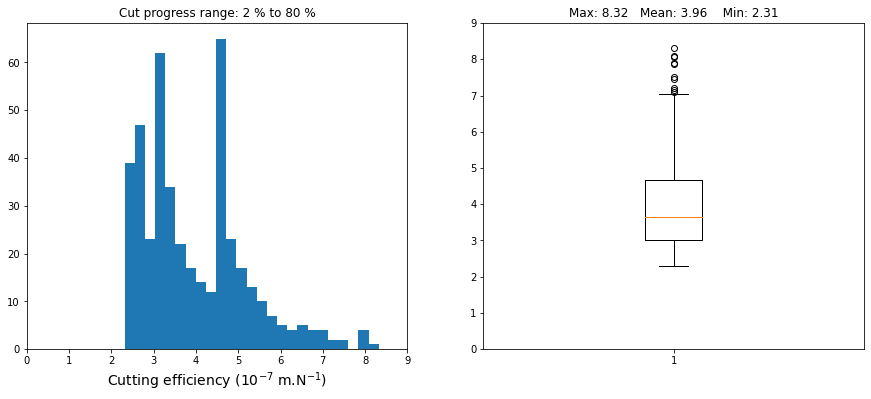

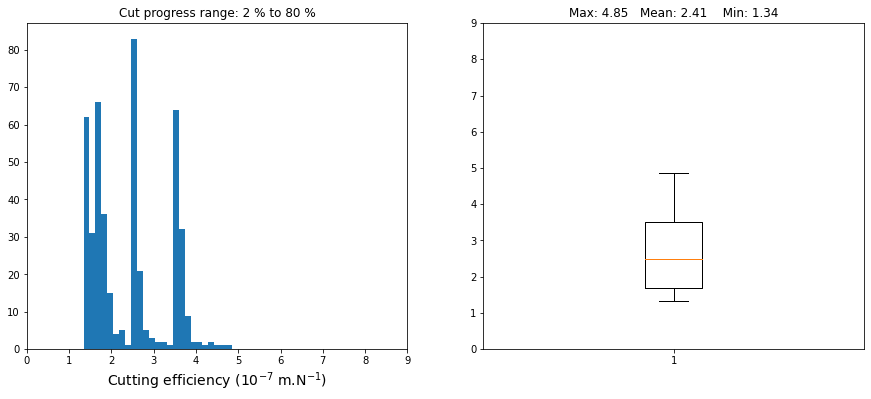

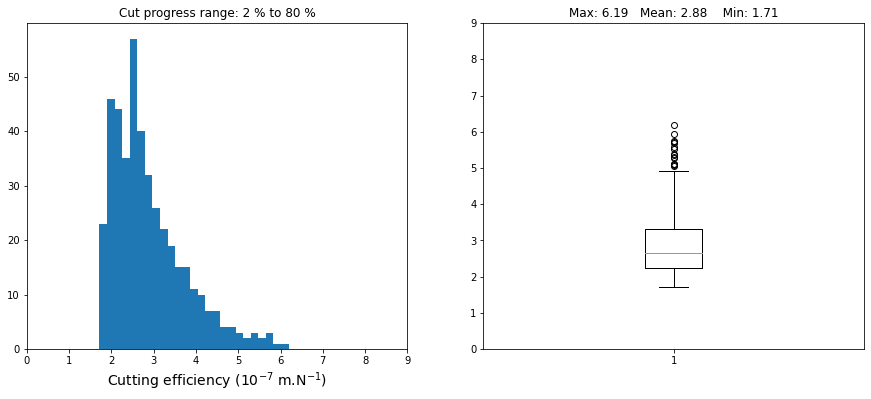

In [5]:
def Kappa_stat(output_file,val_min, val_max, x_min, x_max, bins, sensors_nbr): 
    
    '''
    Version 2021.02.10
    Statistical analysis of the cutting efficiency calculated from the bow in-situ measurements
    by bow2kappa function
    
    Inputs
    - output_file: name of the results file (output of bow2kappa function)
    - val_min, val_max : minimum and maximum values of the cut progress range 
      used for data selection
    - x_min, x_max: minimum and maximum values of the cutting efficiency range 
      used for xaxis in the histogram plot and yaxis in the boxplot
    - sensors_nbr: number of sensors used for the bow in-situ measurements (parameter of the cut)
    
    Outputs
    - Histogram plot of the cutting efficiency values
    - Box plot of the cutting efficiency values
    '''
    
    # 3rd party imports
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # Get the cutting efficiency data to plot
    kappa_cols = {
                0: "B",
                1: "C",
                2: "D",
                3: "E",
                4: "F",
                5: "G"    
                }
    endcol=kappa_cols[sensors_nbr+1]
    usecols = 'B:'+ str(endcol)
    dkappa = pd.read_excel(output_file,
                         sheet_name ='Kappa', 
                         usecols=usecols)
    
    # Select cut progress range
    dkappa.rename({"Cut progress (%)":"A"}, axis=1, inplace=True)
    df = dkappa.query('A > @val_min and A < @val_max') 
    df = df.drop(['A'],axis=1)
    
    # Statistics computation
    df_flatten = df.values.flatten()
    k_mean = "{:5.2f}".format(np.mean(df_flatten)) 
    k_max = "{:5.2f}".format(np.max(df_flatten)) 
    k_min = "{:5.2f}".format(np.min(df_flatten)) 
    
    # Statistics plot
    fig = plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.hist(df_flatten,bins=bins)
    plt.xlim(x_min,x_max)
    plt.xlabel('Cutting efficiency (10$^{-7}$ m.N$^{-1}$)',fontsize=14)  
    plt.title(f'Cut progress range: {val_min} % to {val_max} %')
    
    plt.subplot(1,2,2)
    plt.boxplot(df_flatten)
    plt.ylim(x_min,x_max)
    plt.title(f'Max:{k_max}   Mean:{k_mean}    Min:{k_min}')
    
    plt.show()

# Main for this cell   
# Set the plot range for the cutting progress in % of cut duration
cut_min = 2
cut_max = 80

# Set the plot range for the cutting efficiency in 10^-7 m/N 
eff_min = 0
eff_max = 9

# Set the number of bins for the histogram plot
kappa_bins=25

# call Kappa_stat function
for cut_name in cuts: # process the cuts
    kappa_file_name = 'Results_' +cut_name+'.xlsx'
    kappa_file = my_path / kappa_file_name
    Kappa_stat(kappa_file,cut_min, cut_max,eff_min,eff_max,kappa_bins,sensors_nbr)    